** Seattle AirBnb data analysis **

Airbnb, founded in 2008, is an online marketplace for arranging or offering lodging, primarily homestays, and tourism experiences. It is one of the world’s largest marketplaces for unique, authentic places to stay, offering over 7 million accommodations and 40,000 handcrafted activities, all powered by local hosts. 

As part of the Airbnb Inside initiative, this dataset describes the listing activity of homestays in Seattle, WA.

 My motivation for the project arises from my curiosity to better understand the following:
 1. The cheapest and the most expensive neighborhoods in Seattle
 2. Which time of the year would be the best time to visit Seattle?
 3. Should I prefer booking my AirBnb with a super host?
 4. What factors contribute the most towards being a super host?
 5. What factors in an AirBnb listing contribute to its price?

We will be using the CRISP-DM process to evaluate and analyse the AirBnb Seattle dataset for 2016. The CRISP-DM process covers the following steps:

1. Business Understanding
2. Data Understanding
3. Data Preparation
4. Modeling
5. Evaluation
6. Deployment


Credits: (https://en.wikipedia.org/wiki/Cross-industry_standard_process_for_data_mining)

**CRISP DM Step 1. Business Understanding:**

Airbnb has helped millions of hospitality entrepreneurs monetize their spaces and their passions while keeping the financial benefits of tourism in their own communities. With more than half a billion guest arrivals to date, and accessible in 62 languages across 220+ countries and regions, Airbnb promotes people-to-people connection, community and trust around the world.

Credits: https://news.airbnb.com/en-in/about-us/

In [92]:
# Import packages
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from statistics import mean 
import seaborn as sns #seaborn plot for visualization
sns.set(style="darkgrid")
import matplotlib as mpl
import matplotlib.pyplot as plt

# Suppress warnings for seaborn and pandas SettingwithCopy warnings 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None 

# library imports for linear regressions modelling and prediction
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.metrics import r2_score, mean_squared_error

**CRISP DM Step 2. Data Understanding**

In [93]:
# read in the listings.csv file
df = pd.read_csv("./listings.csv")
# display the first 5 rows of data
df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.00,f,nan,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.00,f,nan,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.00,f,nan,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,nan,f,nan,WASHINGTON,f,flexible,f,f,1,nan
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.00,f,nan,WASHINGTON,f,strict,f,f,1,0.89


Lets define a method that lets us understand the data through exploratory data analysis. The functions this method performs has been included in the docstrings below

In [94]:
def explore_df(df):
    '''
    INPUT
    df - A dataframe
    
    OUTPUT
    print values of different exploratory data analysis steps on the output console
    
    This function :
    1. prints the shape of the dataframe
    2. returns a count and list of categorical and numerical columns
    3. uses the describe() method to print statistics for the numerical columns
    '''
    
    # display the shape, gives us number of rows and column
    print("The dataframe has ",df.shape[0]," rows and ", df.shape[1]," columns \n")
    
    # Subset to a dataframe only holding the categorical columns
    cat_df = return_dtype(df,"object")
    
    # Subset to a dataframe only holding the numerical columns
    num_df = return_dtype(df,"number")
    
    print("There are ",cat_df.shape[1]," categorical columns and ",num_df.shape[1],"numerical columns in the dataframe \n")
    
    print("A list of all the categorical columns \n")
    print(list(cat_df.columns),"\n")
    print("A list of all the numerical columns \n")
    print(list(num_df.columns),"\n")
    
    # gives us a snapshot of all numerical columns and related statistics like mean, min and max values
    print("Statistical details for the numerical columns \n",df.describe())
    

In [95]:
def return_dtype(df,dtype):
    '''
    INPUT
    df - A dataframe
    d_type - the data type of the columns you need to pull from the dataframe i.e. 'number','object'
    
    OUTPUT
    dataframe with only columns of 'dtype' datatype
    
    This function :
    returns a dataframe with columns of the specified data types
    '''
    return df.select_dtypes(include=[dtype]).copy()

In [96]:
explore_df(df)

The dataframe has  3818  rows and  92  columns 

There are  62  categorical columns and  30 numerical columns in the dataframe 

A list of all the categorical columns 

['listing_url', 'last_scraped', 'name', 'summary', 'space', 'description', 'experiences_offered', 'neighborhood_overview', 'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'street', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market', 'smart_location', 'country_code', 'country', 'is_location_exact', 'property_type', 'room_type', 'bed_type', 'amenities', 'price', 'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee', 'extra_

In [97]:
def transform_col(df,cols_list, replace_from, replace_to , to_data_type):
    '''
    INPUT
    df - A dataframe
    cols_list - list of columns that need to be transformed
    replace_from - the character that needs to be replaced in that column 
    replace_to - the character that is the replacement i.e. the replaced value
    to_data_type - the data type to which this column needs to be transformed to
    
    OUTPUT
    None - The dataframe columns are modified inplace i.e. no new columns are created, 
           existing columns in the dataframeare modified
    
    This function :
    1. replaces characters in columns with a user specified value
    2. changes the data types for user specified column(s)
    '''
    for col in cols_list:
        df.loc[:,col] = df.loc[:,col].str.replace(replace_from,replace_to).astype(to_data_type)

**CRISP DM Step 3. Data Preparation **

In [98]:
# columns like price, host response rate and host acceptance rate need to be converted from an object type column to float
# this is done to make sure we can treat them as numerical columns for our analysis in the next steps

# remove the $ sign and commas from the price value
transform_col(df,["price"], ",|\$", "" , float)

# remove % sign from host reponse and acceptance rate
transform_col(df,["host_response_rate",'host_acceptance_rate'], "%", "" , float)
    

Next we are defining methods for exploring null values in the dataset. This allows us to re-use the methods defined below leading us to avoid any columns which have a large number of null values and hence can mislead us in our analysis.

In [99]:
def explore_null(df):
    '''
    INPUT
    df - A dataframe
    
    OUTPUT
    print values of columns which have 25,50 or 75% null values in them
    
    This function :
    1. prints the column which has all null values
    2. print values of columns which have 25,50 or 75% null values in them
    '''
    
    # print list of columns that have "all" null values
    all_nulls = set(df.columns[df.isnull().all()])
    print("The column(s) with all null values: ",all_nulls,"\n")
    
    for perc in range(25,100,25):
        # columns with more than x% of null values
        print(" More than ",perc,"% of values are null for columns ",set(df.columns[df.isnull().mean() > (perc/100)]),"\n")
        

In [100]:
def drop_all_nulls(df):
    '''
    INPUT
    df - A dataframe
    
    OUTPUT
    df - A modified dataframe with any row or column with 'all' null values dropped
    
    This function :
    any row or column with all null values are dropped
    '''
    
    # drop any columns (axis=1) which have 'all' null values
    # make sure you explicitly mention the axis as 1 to indicate you are removing columns
    # default for dropna method is axis=0 which means any rows with null values will be removed
    df = df.dropna(how="all", axis=1)
    
    # drop any rows (axis=0) which have all null values
    df = df.dropna(how="all", axis=0)
    
    return df

In [101]:
explore_null(df)

df = drop_all_nulls(df)

The column(s) with all null values:  {'license'} 

 More than  25 % of values are null for columns  {'cleaning_fee', 'license', 'weekly_price', 'security_deposit', 'square_feet', 'neighborhood_overview', 'notes', 'monthly_price'} 

 More than  50 % of values are null for columns  {'security_deposit', 'monthly_price', 'license', 'square_feet'} 

 More than  75 % of values are null for columns  {'license', 'square_feet'} 



We now explore the distribution of data for some of the important parameters in the dataset:

1. Property types listed
2. Neighborhood 
3. Price range
4. Review_scores rating

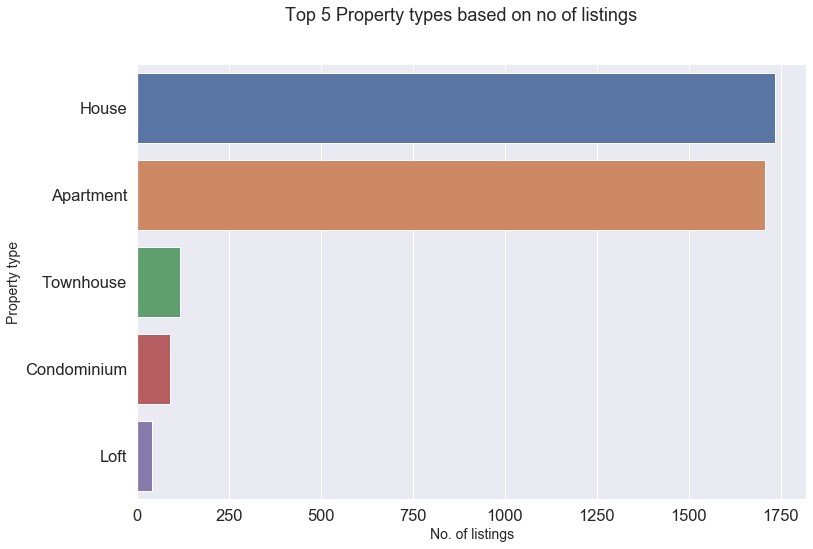

In [102]:
# Top 5 Property types in the data set based on number of listings
sns.set(rc={'figure.figsize':(12,8)}, font_scale=1.5)
sns.countplot(y="property_type",data=df,order = df['property_type'].value_counts()[:5].index);

# Visualization settings 
plt.suptitle("Top 5 Property types based on no of listings", fontsize=18)
plt.xlabel('No. of listings', fontsize=14)
plt.ylabel('Property type', fontsize=14)
plt.show()

** Observation **

Houses and Apartments form the majority share (almost 90%) of the listings, followed by Townhouses and Condos

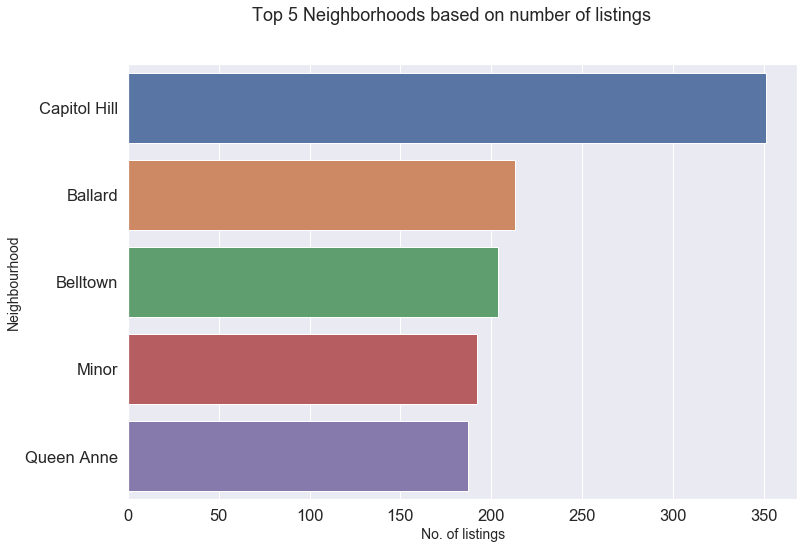

In [103]:
# Top 5 Neighborhoods based on number of listings
sns.countplot(y="neighbourhood",data=df,order = df['neighbourhood'].value_counts()[:5].index);

plt.suptitle("Top 5 Neighborhoods based on number of listings", fontsize=18)
plt.xlabel('No. of listings', fontsize=14)
plt.ylabel('Neighbourhood', fontsize=14)
plt.show()

** Observation **

The Capitol Hill neighbourhood has the most number of listings followed by Ballard and Belltown.

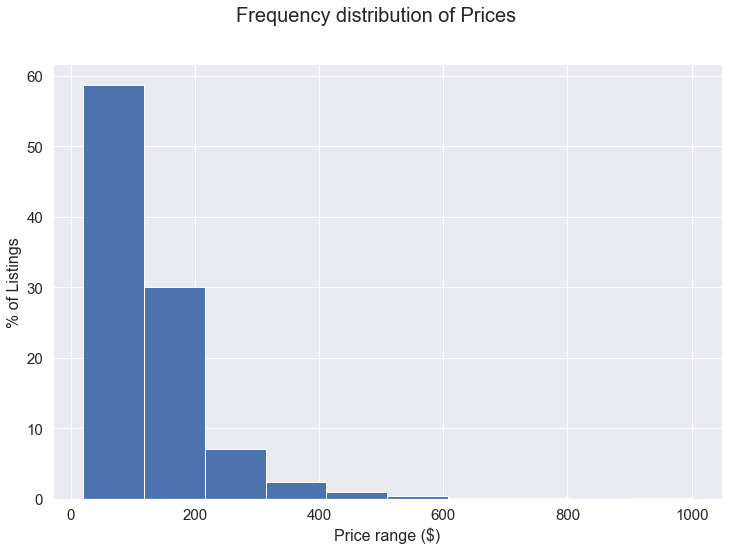

In [104]:
# plot values for listing prices in the dataset in form of a histogram
# this helps us in understanding the overall distribution of listing prices
ax = df['price'].hist(bins=10,ylabelsize=15,xlabelsize=15, weights=np.ones_like(df[df.columns[0]]) * 100. / len(df));

# set x and y text labels
plt.suptitle("Frequency distribution of Prices", fontsize=20)
plt.xlabel('Price range ($)', fontsize=16)
plt.ylabel('% of Listings', fontsize=16)

plt.show()

** Observation **

Based on the histogram, we can observe that approximately 60% of the listings fall into the "below 100 dollars"  bracket followed by 30% of them falling in the 100 to 200 dollar range, with expensive rentals going upto 500 to 900 dollars for a day 

We now move towards looking at the questions we had posed in the beginning

**Q1. The cheapest and the most expensive neighborhoods in Seattle**

In [105]:
# Data Preparation

# select the columns we would need for the analysis, neighbourhood and price
df_nbrhood = df[['neighbourhood','price']]

# grouping the prices by the neighbourhood to a mean value
grouped_df_nbrhood = df_nbrhood.groupby(['neighbourhood']).mean().reset_index()

# format price to be a 2 decimal point value
pd.options.display.float_format = '{:.2f}'.format

# sort price value in descending order
grouped_df_nbrhood.sort_values('price',ascending=False)[:5]


,neighbourhood,price
17,Fairmount Park,370.00
31,Industrial District,245.00
58,Portage Bay,241.43
78,Westlake,197.00
0,Alki,196.65


In [106]:
# Data Evaluation

# sort price value in ascending order to look for the top 5 cheapest places to live at
grouped_df_nbrhood.sort_values('price',ascending=True)[:5]

,neighbourhood,price
64,Roxhill,60.00
52,Olympic Hills,63.67
15,Dunlap,75.46
60,Rainier Beach,76.72
23,Georgetown,77.00


The cheapest neighbourhoods, if you are travelling on a budget, are Roxhill, Olympic Hills and Dunlap. On the other hand, the top most expensive places are Fairmount Park with an average price of 370 , followed by Industrial district and Portage Bay for 245 and 241 respectively. Well, next time you are planning that trip for Seattle, you know where to look for (and which ones to avoid) for the most affordable prices.

**Q2. Which time of the year would be the best time to visit Seattle?**

In [107]:
# Data understanding

# read in the listings.csv file
df_cal = pd.read_csv("./calendar.csv")

# create new columns with months and year separated out
df_cal['year'] = pd.DatetimeIndex(df_cal['date']).year
df_cal['month'] = pd.DatetimeIndex(df_cal['date']).month

# display the first 5 rows of data
df_cal.head()

,listing_id,date,available,price,year,month
0,241032,2016-01-04,t,$85.00,2016,1
1,241032,2016-01-05,t,$85.00,2016,1
2,241032,2016-01-06,f,NaN,2016,1
3,241032,2016-01-07,f,NaN,2016,1
4,241032,2016-01-08,f,NaN,2016,1


In [108]:
explore_df(df_cal)

The dataframe has  1393570  rows and  6  columns 

There are  3  categorical columns and  3 numerical columns in the dataframe 

A list of all the categorical columns 

['date', 'available', 'price'] 

A list of all the numerical columns 

['listing_id', 'year', 'month'] 

Statistical details for the numerical columns 
        listing_id       year      month
count  1393570.00 1393570.00 1393570.00
mean   5550111.42    2016.01       6.53
std    2962273.53       0.07       3.44
min       3335.00    2016.00       1.00
25%    3258213.00    2016.00       4.00
50%    6118244.50    2016.00       7.00
75%    8035212.00    2016.00      10.00
max   10340165.00    2017.00      12.00


**Conclusion**

Years included are only 2016 and 2017
Prices range from a min of 10 to a max of 1650

In [109]:
# check for null columns in the dataframe
explore_null(df_cal)

The column(s) with all null values:  set() 

 More than  25 % of values are null for columns  {'price'} 

 More than  50 % of values are null for columns  set() 

 More than  75 % of values are null for columns  set() 



In [110]:
# check what % of values are null in price
np.mean(df_cal.price.isnull())

0.32938998399793334

Around 33% of values for prices are null. We will be using the method of forward fill for imputing these null values with the last valid price value in the column whenever there is a null value encountered.

In [111]:
# Data Preparation

# drop the column 'available' as we wont be using it for our analysis
df_cal.drop(['available'],axis=1,inplace=True)

# use the transform_col method to convert price into a float dtype
transform_col(df_cal,["price"], ",|\$", "" , float)

# handle missing values by using the forward fill method
df_cal['price'].fillna(method="ffill",inplace=True)

In [112]:
df_cal.head()

,listing_id,date,price,year,month
0,241032,2016-01-04,85.00,2016,1
1,241032,2016-01-05,85.00,2016,1
2,241032,2016-01-06,85.00,2016,1
3,241032,2016-01-07,85.00,2016,1
4,241032,2016-01-08,85.00,2016,1


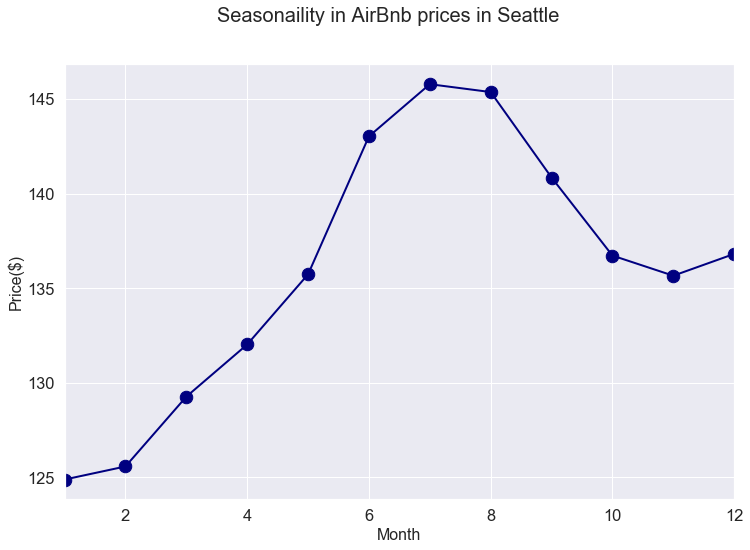

In [113]:
# group the dataframe by month and price
df_cal_grouped = df_cal.groupby(['month'])['price'].mean()

# plot a graph of price vs month
ax = df_cal_grouped.plot(lw=2, colormap='jet', marker='.', markersize=25);
ax.set_xlabel("Month")
ax.set_ylabel("Price")

# set x and y text labels
plt.suptitle("Seasonaility in AirBnb prices in Seattle", fontsize=20)
plt.xlabel('Month', fontsize=16)
plt.ylabel('Price($)', fontsize=16)

plt.show()

**Conclusion**

June to September is the busiest time to be in Seattle. Depending on whether you are running on a budget or willing to spend some extra bucks, you can plan your next trip to Seattle based on our analysis here.

**Q3. Should I prefer booking my AirBnb with a super host?**

**How AirBnb selects its super hosts**

The Superhost program celebrates and rewards Airbnb’s top-rated and most experienced hosts. AirBnB requires hosts to qualify for a level of qualification, explained below, in order to get certified as a superhost:
 
a) **4.8+ overall rating**
Superhosts have a 4.8 or higher average overall rating based on reviews from their Airbnb guests in the past year.

b) **10+ stays**
Superhosts have completed at least 10 stays in the past year or 100 nights over at least 3 completed stays.

c) **Less than 1% cancellation rate**
Superhosts cancel less than 1% of the time, not including extenuating circumstances. This means 0 cancellations for hosts with fewer than 100 reservations in a year.

d) **90% response rate**
Superhosts respond to 90% of new messages within 24 hours. When guests ask you questions, they know that a quick response is only a message away.

Credits: https://www.airbnb.com/superhost

In [114]:
# select the columns which will help us analyze the review scores based on host's status as a superhost
df_suph_rating = df[['host_is_superhost','review_scores_rating','number_of_reviews']]

# transform the values in the "host_is_superhost" column to convert t values to true and f to false
df_suph_rating.loc[:,'host_is_superhost'] = df_suph_rating.loc[:,'host_is_superhost'].apply(lambda x: "yes" if x=='t' else "no");

In [115]:
# calculate the mean values of review scores and the number of reviews based on superhost status
df_suph_rating.groupby(['host_is_superhost']).mean()

,review_scores_rating,number_of_reviews
host_is_superhost,,
no,93.65,17.22
yes,97.40,41.76


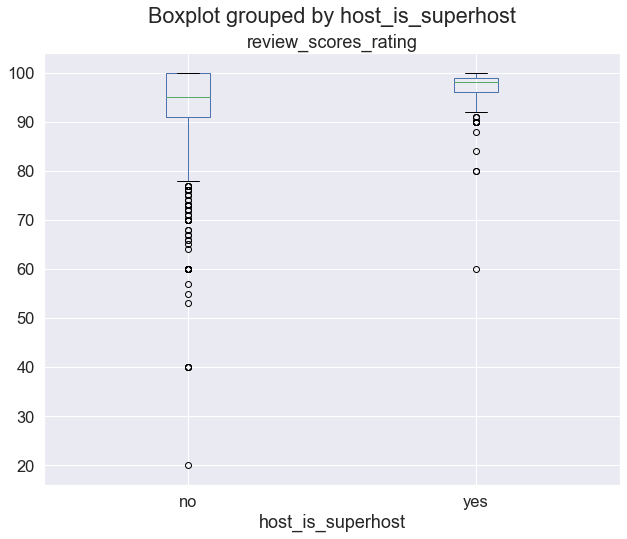

In [116]:
# a further look at the box plot distribution of the score rating based on superhost status
df_suph_rating.boxplot(column=['review_scores_rating'],by="host_is_superhost",figsize=(10, 8));

plt.show()

**Conclusion**

Superhosts, as expected, have better scores rating (97.4 for superhosts and 93.6 for non superhosts) and higher number of reviews in the dataset. So, it is always a good idea to prefer superhosts for your bookings, especially if its your first time visiting Seattle.

**Q4. What factors contributed the most towards being a super host?**

In [117]:
def one_hot_encode(df):
    '''
    INPUT
    df - A dataframe
    
    OUTPUT
    df - modified dataframe
    
    This function :
    1. drops all categorical columns
    2. encodes all categorical columns with one hot encoding i.e. each value in the column is separated out into
       a different column, column names separated with '_'
       
    Reason behind one hot encoding: 
    Categorical columns do not fit into a linear regression model. One-hot encoding is a great tool for turning some of 
    these categorical features into multiple binary features; the presence or absence of the individual categorical unit 
    can then be fit into the linear regression.
    
    (Credits: https://medium.com/@jjosephmorrison/one-hot-encoding-to-set-up-categorical-features-for-linear-regression-6bac35661bb6)
    '''
    # return all categorical columns
    cat_df = return_dtype(df,'object')
    # store the column list
    cat_cols = cat_df.columns

    # for each categorical column add dummy var, drop original column
    for col in cat_cols:
        try:

            df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=False)], axis=1)
        except:
            continue
    return df
    

In [118]:
# Data preparation

df_host = df.copy()

# select feature columns
df_host = df_host[['review_scores_rating','host_response_time',
                   'host_response_rate','host_is_superhost','host_identity_verified']]

# convert the boolean values of t/f to float 1/0 and transform columns into float
for col in ['host_is_superhost','host_identity_verified']:
    df_host.loc[:,col] = df_host.loc[:,col].apply(lambda x: 1 if x=='t' else 0);
    df_host.loc[:,col] = df_host.loc[:,col].astype(float);

# select the categorical and numerical columns
#num_df = return_dtype(df_host,'number')

df_host = one_hot_encode(df_host)

# Cleanup for null values

# Dropping rows where the superhost value is null
df_host = df_host.dropna(subset=['host_is_superhost'], axis=0)

#dropping any columns with all NaN values
drop_all_nulls(df_host)
#df_host.dropna(axis=1, how="all", inplace=True)
    
#for cols in num_df.columns:
#fill NaN values with the mean of the column
df_host.fillna(df.mean(), inplace=True)

df_host.columns

Index(['review_scores_rating', 'host_response_rate', 'host_is_superhost',
       'host_identity_verified', 'host_response_time_within a day',
       'host_response_time_within a few hours',
       'host_response_time_within an hour'],
      dtype='object')

In [119]:
df_host.head()

,review_scores_rating,host_response_rate,host_is_superhost,host_identity_verified,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour
0,95.00,96.00,0.00,1.00,0,1,0
1,96.00,98.00,1.00,1.00,0,0,1
2,97.00,67.00,0.00,1.00,0,1,0
3,94.54,94.89,0.00,1.00,0,0,0
4,92.00,100.00,0.00,1.00,0,0,1


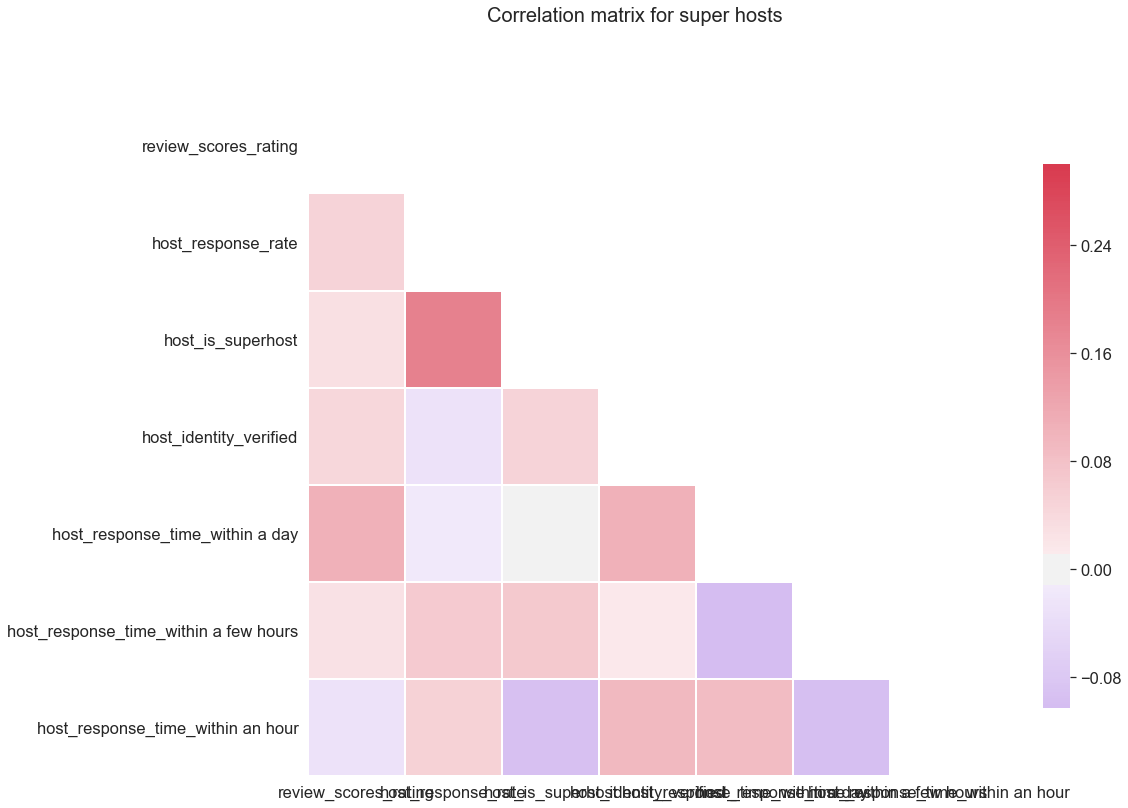

In [120]:
# The following piece of code has been borrowed from the official seaborn website, example for pairwise correlation
# Credits: https://seaborn.pydata.org/examples/many_pairwise_correlations.html

sns.set(style="white",font_scale=1.5)

# Generate a large random dataset
rs = np.random.RandomState(33)
d = pd.DataFrame(data=rs.normal(size=(100, df_host.shape[1])),
                 columns=list(df_host.columns))

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 12.5))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(1000,8, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.8, cbar_kws={"shrink": 0.8});

# Visual changes for the map
plt.xticks(rotation=0)

# set x and y text labels
plt.suptitle("Correlation matrix for super hosts", fontsize=20)

plt.show()

In [121]:
# visualization with the correlation score explicitly stated

import numpy as np
rs = np.random.RandomState(0)

corr = df_host.corr()
corr.style.background_gradient(cmap='PuBu')

,review_scores_rating,host_response_rate,host_is_superhost,host_identity_verified,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour
review_scores_rating,1,0.130052,0.231712,0.0721148,-0.0155181,-0.060848,0.0805652
host_response_rate,0.130052,1,0.148387,0.0802735,-0.337424,0.0535064,0.309087
host_is_superhost,0.231712,0.148387,1,0.146076,-0.115746,0.00111964,0.188777
host_identity_verified,0.0721148,0.0802735,0.146076,1,-0.0274252,0.0119475,0.121708
host_response_time_within a day,-0.0155181,-0.337424,-0.115746,-0.0274252,1,-0.250904,-0.38407
host_response_time_within a few hours,-0.060848,0.0535064,0.00111964,0.0119475,-0.250904,1,-0.519917
host_response_time_within an hour,0.0805652,0.309087,0.188777,0.121708,-0.38407,-0.519917,1


**Conclusion**

As is visible from the correlation matrix above (the third row for the field "host_is_superhost"), two of the biggest factors influencing the superhost status are the "review_scores_rating" and the "host_reponse_rate"

** Q5. What factors in an AirBnb listing contributed to its price?**

We will be building a linear regression model to help predict prices in the Seattle area. Based on our analysis, we can then narrow down the factors which mostly drive the prices in the area.

In [122]:
# Data preparation

df_predprice = df.copy()

# we create a new column to take a count of number of amenities a listing has to offer
df_predprice['no_of_amenities'] = df_predprice['amenities'].apply(lambda x: len(x.split(",")))

# We use pearson's coefficent in a correlation matrix to 
# select the top 15 variables that has a relationship with the target variable i.e. price

# create a correlation object
correlation = df_predprice.corr(method='pearson')

# select the top 25 columns with a high correlation with "price"
columns = correlation.nlargest(25, 'price').index

columns

Index(['price', 'accommodates', 'bedrooms', 'beds', 'square_feet', 'bathrooms',
       'guests_included', 'no_of_amenities', 'host_listings_count',
       'host_total_listings_count', 'review_scores_location',
       'review_scores_rating', 'review_scores_cleanliness',
       'review_scores_accuracy', 'minimum_nights',
       'review_scores_communication', 'review_scores_checkin',
       'host_acceptance_rate', 'maximum_nights', 'latitude',
       'host_response_rate', 'availability_365', 'availability_30',
       'review_scores_value', 'id'],
      dtype='object')

In [123]:
# select feature columns which would be useful to predict the prices
df_predprice = df_predprice[['no_of_amenities','accommodates','guests_included','square_feet','zipcode',
                             'review_scores_location','property_type','room_type',
                             'bathrooms', 'bedrooms', 'beds', 'price']]


In [124]:
explore_df(df_predprice)

The dataframe has  3818  rows and  12  columns 

There are  3  categorical columns and  9 numerical columns in the dataframe 

A list of all the categorical columns 

['zipcode', 'property_type', 'room_type'] 

A list of all the numerical columns 

['no_of_amenities', 'accommodates', 'guests_included', 'square_feet', 'review_scores_location', 'bathrooms', 'bedrooms', 'beds', 'price'] 

Statistical details for the numerical columns 
        no_of_amenities  accommodates  guests_included  square_feet  \
count          3818.00       3818.00          3818.00        97.00   
mean             14.37          3.35             1.67       854.62   
std               4.71          1.98             1.31       671.40   
min               1.00          1.00             0.00         0.00   
25%              11.00          2.00             1.00       420.00   
50%              14.00          3.00             1.00       750.00   
75%              17.00          4.00             2.00      1200.00   
max

In [125]:
explore_null(df_predprice)

The column(s) with all null values:  set() 

 More than  25 % of values are null for columns  {'square_feet'} 

 More than  50 % of values are null for columns  {'square_feet'} 

 More than  75 % of values are null for columns  {'square_feet'} 



Considering that more than 75% of values for square_feet are null values, it would be better to drop off the column from our analysis.The reason we drop off the column instead of imputing values for it is because imputing values for square_feet would mislead our prediction of prices. 

In [126]:
# drop the square_feet column
df_predprice.drop(['square_feet'],axis=1,inplace=True)

# drop columns and rows, if any, with all nulls
drop_all_nulls(df_predprice)

# Dropping rows where the price is null
df_predprice = df_predprice.dropna(subset=['price'], axis=0)

#explore the null values again
explore_null(df_predprice)

The column(s) with all null values:  set() 

 More than  25 % of values are null for columns  set() 

 More than  50 % of values are null for columns  set() 

 More than  75 % of values are null for columns  set() 



As we can observe, none of the columns now have all nulls or more than 25% of null values in them, which is a great step to go ahead to our modelling analysis

Next step: One hot encoding for categorical variables

Reason behind one hot encoding: 
    Categorical columns do not fit into a linear regression model. One-hot encoding is a great tool for turning some of 
    these categorical features into multiple binary features; the presence or absence of the individual categorical unit 
    can then be fit into the linear regression.
    
    (Credits: https://medium.com/@jjosephmorrison/one-hot-encoding-to-set-up-categorical-features-for-linear-regression-6bac35661bb6)

In [127]:
# One hot encoding
df_predprice = one_hot_encode(df_predprice)

# a peek at the newly created columns
df_predprice.columns

Index(['no_of_amenities', 'accommodates', 'guests_included',
       'review_scores_location', 'bathrooms', 'bedrooms', 'beds', 'price',
       'zipcode_98102', 'zipcode_98103', 'zipcode_98104', 'zipcode_98105',
       'zipcode_98106', 'zipcode_98107', 'zipcode_98108', 'zipcode_98109',
       'zipcode_98112', 'zipcode_98115', 'zipcode_98116', 'zipcode_98117',
       'zipcode_98118', 'zipcode_98119', 'zipcode_98121', 'zipcode_98122',
       'zipcode_98125', 'zipcode_98126', 'zipcode_98133', 'zipcode_98134',
       'zipcode_98136', 'zipcode_98144', 'zipcode_98146', 'zipcode_98177',
       'zipcode_98178', 'zipcode_98199', 'zipcode_99\n98122',
       'property_type_Bed & Breakfast', 'property_type_Boat',
       'property_type_Bungalow', 'property_type_Cabin',
       'property_type_Camper/RV', 'property_type_Chalet',
       'property_type_Condominium', 'property_type_Dorm',
       'property_type_House', 'property_type_Loft', 'property_type_Other',
       'property_type_Tent', 'property_type

In [128]:
# With the newly created categorical columns, its important to remove null values for columns
# in order to avoid any errors in our modeling process

# we fill NaN values with the mean of the column
df_predprice.fillna(df.mean(), inplace=True)

**CRISP DM Step 4. Modeling **

In [129]:
# Select columns
y = df_predprice['price']
X = df_predprice.drop('price',axis=1)

# train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)

#Four steps:

#Instantiate
lm_model = LinearRegression(normalize=True)

In [130]:
#Fit the model
lm_model.fit(X_train, y_train) 

#Predict
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)

#Score
train_score = r2_score(y_train, y_train_preds)
test_score = r2_score(y_test, y_test_preds)

print("train score : %.2f"%train_score)
print("test score : %.2f"%test_score)

train score : 0.57
test score : 0.59


** Lets try implementing Lasso(L1) and Ridge(L2) Regression to see if we can improve upon this test score **

** i) L1 (Lasso) Regression **

In [131]:
# List to maintain the cross-validation scores 
cross_val_scores_lasso = [] 
  
# List to maintain the different values of Lambda 
Lambda = [] 
  
# Loop to compute the cross-validation scores 
for i in range(1, 9): 
    lassoModel = Lasso(alpha = i * 0.25, tol = 0.0925) 
    lassoModel.fit(X_train, y_train) 
    scores = cross_val_score(lassoModel, X, y, cv = 10) 
    avg_cross_val_score = mean(scores)*100
    cross_val_scores_lasso.append(avg_cross_val_score) 
    Lambda.append(i * 0.25) 
  
# Loop to print the different values of cross-validation scores 
for i in range(0, len(Lambda)): 
    print(str(Lambda[i])+' : '+str(cross_val_scores_lasso[i])) 

0.25 : 50.673777595522765
0.5 : 49.912356521713214
0.75 : 49.361869610054924
1.0 : 48.9490546380787
1.25 : 48.42139246487677
1.5 : 47.679882228376535
1.75 : 47.213592221706136
2.0 : 47.2319704778027


The value 0.25 for lambda yields the best results for us.

In [132]:
lassoModel = Lasso(alpha = 0.25, normalize=True) 
lassoModel.fit(X_train, y_train) 

#Predict
y_test_preds = lassoModel.predict(X_test)
y_train_preds = lassoModel.predict(X_train)

#Score
train_score = r2_score(y_train, y_train_preds)
test_score = r2_score(y_test, y_test_preds)

print("train score : %.2f"%train_score)
print("test score : %.2f"%test_score)

train score : 0.46
test score : 0.49


Credits: https://www.analyticsvidhya.com/blog/2017/06/a-comprehensive-guide-for-linear-ridge-and-lasso-regression/

L1 regression is generally used when we have more number of features, because it automatically does feature selection.

** ii) L2 (Ridge) Regression **

In [133]:
# List to maintain the different cross-validation scores 
cross_val_scores_ridge = [] 
  
# List to maintain the different values of alpha 
alpha = [] 
  
# Loop to compute the different values of cross-validation scores 
for i in range(1, 9): 
    ridgeModel = Ridge(alpha = i * 0.25) 
    ridgeModel.fit(X_train, y_train) 
    scores = cross_val_score(ridgeModel, X, y, cv = 10) 
    avg_cross_val_score = mean(scores)*100
    cross_val_scores_ridge.append(avg_cross_val_score) 
    alpha.append(i * 0.25) 
  
# Loop to print the different values of cross-validation scores 
for i in range(0, len(alpha)): 
    print(str(alpha[i])+' : '+str(cross_val_scores_ridge[i])) 

0.25 : 49.423738651145555
0.5 : 49.831600078784824
0.75 : 50.17528554695576
1.0 : 50.467668064274854
1.25 : 50.71813759139566
1.5 : 50.93390454962782
1.75 : 51.12065758445949
2.0 : 51.2829611491186


The value 2 for alpha yields the best results for us.

In [134]:
ridgeModel = Ridge(alpha = 2, normalize=True) 
ridgeModel.fit(X_train, y_train) 

#Predict
y_test_preds = ridgeModel.predict(X_test)
y_train_preds = ridgeModel.predict(X_train)

#Score
train_score = r2_score(y_train, y_train_preds)
test_score = r2_score(y_test, y_test_preds)

print("train score : %.2f"%train_score)
print("test score : %.2f"%test_score)

train score : 0.46
test score : 0.49


Significance of R-Sqaured and Goodness-of-fit for a Linear Model

https://blog.minitab.com/blog/adventures-in-statistics-2/regression-analysis-how-do-i-interpret-r-squared-and-assess-the-goodness-of-fit#:~:text=R%2Dsquared%20is%20a%20statistical,multiple%20determination%20for%20multiple%20regression.&text=0%25%20indicates%20that%20the%20model,response%20data%20around%20its%20mean.

** Model Performance and Learnings **

Both lasso and ridge regression do not give us any improvement in our r2 score. It is, on the contrary, bringing our r2_score down. Why?

One of the reasons lasso regression does not necessarily improve our r2 score is when we have correlated variables, it retains only one variable and sets other correlated variables to zero. That will possibly lead to some loss of information resulting in lower accuracy in our model.

While applying ridge regression, it will retain all of the features but will shrink the coefficients. But the problem is that model will still remain complex as all the features are still present in the model, thus may lead to poor model performance. 

Ridge regression won't necessarily improve the error. The goal of the regularization is to make a simpler model to avoid overfitting and thus better prediction on the independent set. However, if overfitting is not a problem (for example when there are much more samples than features), more complex model (less regularized) might predict better. Often models predict better when they are more complex and not less, which is why things like neural networks, random forests and kernels exist.


Therefore, for now we are able to predict, only with approx 59% accuracy, the price of an AirBnb rental in Seattle based on the 

1. zipcode: which is essentially telling us about the neighbourhood the rental is located in
2. property_type: the type of property i.e. a house, lofts, townhouses, condos etc.
3. room_type: private or shared
4. number of bathrooms: ranging from 1 to 8
5. bedrooms: ranging from 1 to 7
6. number of beds: ranging from 1 to 2
7. accommodates: ranging from 1 to 16
8. guests included: ranging from 1 to 15
9. review scores location: ranging from 4 to 10

PS: The accuracy for this model can be improved based on further applications of feature engineering and improved model selections. The current process focuses on the EDA (Exploratory Data Analysis) and the CRISP-DM (Cross-industry standard process for data mining) process for data science

**CRISP DM Step 5. Evaluation **

In [135]:
def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['weight'] = lm_model.coef_
    coefs_df['feature'] = coefs_df['est_int'].apply(lambda x: x.split("_")[0])
    coefs_df['absolute_weight'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('absolute_weight', ascending=False)
    return coefs_df

#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

#A quick look at the top results
coef_df.head(10)

,est_int,weight,feature,absolute_weight
35,property_type_Boat,130.23,property,130.23
30,zipcode_98177,-88.16,zipcode,88.16
31,zipcode_98178,-85.35,zipcode,85.35
41,property_type_Dorm,-68.28,property,68.28
25,zipcode_98133,-66.84,zipcode,66.84
26,zipcode_98134,65.58,zipcode,65.58
50,room_type_Shared room,-65.18,room,65.18
13,zipcode_98108,-64.23,zipcode,64.23
11,zipcode_98106,-63.00,zipcode,63.00
19,zipcode_98118,-57.75,zipcode,57.75


**Conclusion**

Based on the coefficient value above, the factors of  **"property type"** along with the **"zipcode"** are the biggest influencing factors for an AirBnB rental in the Seattle area. This is in line with the common notion that rentals in expensive neighbourhoods lead up to higher prices, in addition to the property type being rented out.

When you are looking for your next trip to Seattle, try selecting between different neighbourhoods and property types to find that ideal weekend getaway in Seattle.